In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [15]:
df = pd.read_csv("aircrahesFullDataUpdated_2024 (4).csv")
df.head()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
0,1970,Qtr 2,April,28,NaN,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11
1,1952,Qtr 2,April,30,NaN,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9
2,1973,Qtr 2,April,10,NaN,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145
3,2000,Qtr 2,April,19,'-,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24
4,1946,Qtr 2,April,30,'-,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12


Data Preparation and Cleaning

In [17]:
df.shape

(5035, 12)

In [19]:
df.size

60420

In [21]:
df.columns

Index(['Year', 'Quarter', 'Month', 'Day', 'Country/Region',
       'Aircraft Manufacturer', 'Aircraft', 'Location', 'Operator', 'Ground',
       'Fatalities (air)', 'Aboard'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5035 entries, 0 to 5034
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   5035 non-null   int64 
 1   Quarter                5035 non-null   object
 2   Month                  5035 non-null   object
 3   Day                    5035 non-null   int64 
 4   Country/Region         4805 non-null   object
 5   Aircraft Manufacturer  5035 non-null   object
 6   Aircraft               5035 non-null   object
 7   Location               5035 non-null   object
 8   Operator               4801 non-null   object
 9   Ground                 5035 non-null   int64 
 10  Fatalities (air)       5035 non-null   int64 
 11  Aboard                 5035 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 472.2+ KB


In [31]:
df.duplicated().sum()

0

In [33]:
df.describe()

,Year,Day,Ground,Fatalities (air),Aboard
count,5035.000000,5035.000000,5035.000000,5035.000000,5035.000000
mean,1970.991063,15.785104,1.704469,22.218868,31.107249
std,24.814467,8.794474,55.105115,34.948929,45.740185
min,1908.000000,1.000000,0.000000,0.000000,0.000000
25%,1951.000000,8.000000,0.000000,4.000000,7.000000
50%,1970.000000,16.000000,0.000000,11.000000,16.000000
75%,1992.000000,23.000000,0.000000,25.000000,34.500000
max,2024.000000,31.000000,2750.000000,583.000000,644.000000


In [35]:
df.describe(include="object")

,Quarter,Month,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator
count,5035,5035,4805,5035,5035,5035,4801
unique,4,12,527,633,3525,4170,2631
top,Qtr 4,December,Russia,Douglas,Boeing B 737,Moscow Russia,Aeroflot
freq,1368,497,249,994,73,16,188


In [37]:
df.isna().sum()

Year                       0
Quarter                    0
Month                      0
Day                        0
Country/Region           230
Aircraft Manufacturer      0
Aircraft                   0
Location                   0
Operator                 234
Ground                     0
Fatalities (air)           0
Aboard                     0
dtype: int64

In [39]:
df = df.sort_values(by = "Year")
df

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
5018,1908,Qtr 3,September,17,Virginia,Wright Flyer,Wright Flyer III?,Fort Myer Virginia,Army U.S. - Military,0,1,2
4747,1909,Qtr 3,September,7,France?,Wright,Wright ByplaneSC1,Juvisy-sur-Orge France?,NaN,0,1,1
2428,1912,Qtr 3,July,12,New,Dirigible?,Dirigible?,Atlantic City New,Navy U.S. - JerseyMilitary,0,5,5
4853,1913,Qtr 3,September,9,NaN,Zeppelin,Zeppelin L 1 (airship)?,Over the North SeaMilitary - German Navy,NaN,0,14,20
4292,1913,Qtr 4,October,17,Germany,Zeppelin,Zeppelin L 2 (airship)?,Near Johannisthal Germany,Navy German - Military,0,28,28
...,...,...,...,...,...,...,...,...,...,...,...,...
1667,2024,Qtr 1,January,23,NWT Canada,BAe,BAe 3212 Jetstream,Fort Smith,Northwestern Air Lease LTD,0,6,7
1668,2024,Qtr 1,January,18,Somalia,Fokker,Fokker 505YJWG,Ceel Barde,Jetways Airlines,0,1,4
1666,2024,Qtr 1,January,2,Japan,Airbus,Airbus A350-941/de Havilla DHC,Tokyo,Japan Airlines Japan Coast Guard,0,5,385
3352,2024,Qtr 2,May,21,Myanmar,Boeing,Boeing 777-312ER9V-SWM,Over Irrawaddy Basin,Singapore Airllines,0,1,229


In [29]:
df = df.reset_index(drop=True)
df.head()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
0,1970,Qtr 2,April,28,NaN,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11
1,1952,Qtr 2,April,30,NaN,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9
2,1973,Qtr 2,April,10,NaN,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145
3,2000,Qtr 2,April,19,'-,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24
4,1946,Qtr 2,April,30,'-,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12


In [41]:
df.loc[:,"Country/Region"]=df.loc[:,"Country/Region"].str.replace("'-",'').str.replace("?",'').str.replace("10","None").str.replace("100","None").str.replace("110","None").str.replace("116","None").str.replace("18","None").str.replace("325","None").str.replace("570","None").str.replace("800","None")
df

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
5018,1908,Qtr 3,September,17,Virginia,Wright Flyer,Wright Flyer III?,Fort Myer Virginia,Army U.S. - Military,0,1,2
4747,1909,Qtr 3,September,7,France,Wright,Wright ByplaneSC1,Juvisy-sur-Orge France?,NaN,0,1,1
2428,1912,Qtr 3,July,12,New,Dirigible?,Dirigible?,Atlantic City New,Navy U.S. - JerseyMilitary,0,5,5
4853,1913,Qtr 3,September,9,NaN,Zeppelin,Zeppelin L 1 (airship)?,Over the North SeaMilitary - German Navy,NaN,0,14,20
4292,1913,Qtr 4,October,17,Germany,Zeppelin,Zeppelin L 2 (airship)?,Near Johannisthal Germany,Navy German - Military,0,28,28
...,...,...,...,...,...,...,...,...,...,...,...,...
1667,2024,Qtr 1,January,23,NWT Canada,BAe,BAe 3212 Jetstream,Fort Smith,Northwestern Air Lease LTD,0,6,7
1668,2024,Qtr 1,January,18,Somalia,Fokker,Fokker 505YJWG,Ceel Barde,Jetways Airlines,0,1,4
1666,2024,Qtr 1,January,2,Japan,Airbus,Airbus A350-941/de Havilla DHC,Tokyo,Japan Airlines Japan Coast Guard,0,5,385
3352,2024,Qtr 2,May,21,Myanmar,Boeing,Boeing 777-312ER9V-SWM,Over Irrawaddy Basin,Singapore Airllines,0,1,229


In [43]:
df.loc[:,"Country/Region"]=df.loc[:,"Country/Region"].fillna("None")
df.head()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
5018,1908,Qtr 3,September,17,Virginia,Wright Flyer,Wright Flyer III?,Fort Myer Virginia,Army U.S. - Military,0,1,2
4747,1909,Qtr 3,September,7,France,Wright,Wright ByplaneSC1,Juvisy-sur-Orge France?,NaN,0,1,1
2428,1912,Qtr 3,July,12,New,Dirigible?,Dirigible?,Atlantic City New,Navy U.S. - JerseyMilitary,0,5,5
4853,1913,Qtr 3,September,9,None,Zeppelin,Zeppelin L 1 (airship)?,Over the North SeaMilitary - German Navy,NaN,0,14,20
4292,1913,Qtr 4,October,17,Germany,Zeppelin,Zeppelin L 2 (airship)?,Near Johannisthal Germany,Navy German - Military,0,28,28


In [34]:
df.loc[:,"Aircraft Manufacturer"]=df.loc[:,"Aircraft Manufacturer"].str.replace("?",'').str.replace("139","None").str.replace("42","None")
df.head()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
0,1970,Qtr 2,April,28,None,de Havilland Canada,de Havilland Canada DHC 6 Twin Otter 100VH,Kainatu,Airlines Australia GuineaTrans New,0,8,11
1,1952,Qtr 2,April,30,None,Douglas,Douglas DC 3VT,Delhi,Airways IndiaDeccan,0,9,9
2,1973,Qtr 2,April,10,None,Vickers Vanguard,Vickers Vanguard 952G AXOP,Near Basel,(UK) Airlines International SwitzerlandInvicta,0,108,145
3,2000,Qtr 2,April,19,,Antonov,Antonov AN 8TL,Pepa -,Airlines Centrafricain,0,24,24
4,1946,Qtr 2,April,30,,Douglas,Douglas C 47A FZ559,Pindi-Khut -,Force Air Royal,0,12,12


In [45]:
df.loc[:,"Aircraft"]=df.loc[:,"Aircraft"].str.replace("?",'')
df.head()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
5018,1908,Qtr 3,September,17,Virginia,Wright Flyer,Wright Flyer III,Fort Myer Virginia,Army U.S. - Military,0,1,2
4747,1909,Qtr 3,September,7,France,Wright,Wright ByplaneSC1,Juvisy-sur-Orge France?,NaN,0,1,1
2428,1912,Qtr 3,July,12,New,Dirigible?,Dirigible,Atlantic City New,Navy U.S. - JerseyMilitary,0,5,5
4853,1913,Qtr 3,September,9,None,Zeppelin,Zeppelin L 1 (airship),Over the North SeaMilitary - German Navy,NaN,0,14,20
4292,1913,Qtr 4,October,17,Germany,Zeppelin,Zeppelin L 2 (airship),Near Johannisthal Germany,Navy German - Military,0,28,28


In [38]:
df.loc[:,"Location"]=df.loc[:,"Location"].str.replace("?",'')
df.head()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
5018,1908,Qtr 3,September,17,Virginia,Wright Flyer,Wright Flyer III,Fort Myer Virginia,Army U.S. - Military,0,1,2
4747,1909,Qtr 3,September,7,France,Wright,Wright ByplaneSC1,Juvisy-sur-Orge France,NaN,0,1,1
2428,1912,Qtr 3,July,12,New,Dirigible,Dirigible,Atlantic City New,Navy U.S. - JerseyMilitary,0,5,5
4853,1913,Qtr 3,September,9,None,Zeppelin,Zeppelin L 1 (airship),Over the North SeaMilitary - German Navy,NaN,0,14,20
4292,1913,Qtr 4,October,17,Germany,Zeppelin,Zeppelin L 2 (airship),Near Johannisthal Germany,Navy German - Military,0,28,28


In [47]:
df.loc[:,"Operator"]=df.loc[:,"Operator"].fillna("None")
df.head()

,Year,Quarter,Month,Day,Country/Region,Aircraft Manufacturer,Aircraft,Location,Operator,Ground,Fatalities (air),Aboard
5018,1908,Qtr 3,September,17,Virginia,Wright Flyer,Wright Flyer III,Fort Myer Virginia,Army U.S. - Military,0,1,2
4747,1909,Qtr 3,September,7,France,Wright,Wright ByplaneSC1,Juvisy-sur-Orge France?,None,0,1,1
2428,1912,Qtr 3,July,12,New,Dirigible?,Dirigible,Atlantic City New,Navy U.S. - JerseyMilitary,0,5,5
4853,1913,Qtr 3,September,9,None,Zeppelin,Zeppelin L 1 (airship),Over the North SeaMilitary - German Navy,None,0,14,20
4292,1913,Qtr 4,October,17,Germany,Zeppelin,Zeppelin L 2 (airship),Near Johannisthal Germany,Navy German - Military,0,28,28


In [49]:
df.isna().sum()

Year                     0
Quarter                  0
Month                    0
Day                      0
Country/Region           0
Aircraft Manufacturer    0
Aircraft                 0
Location                 0
Operator                 0
Ground                   0
Fatalities (air)         0
Aboard                   0
dtype: int64

RESEARCH QUESTIONS

In [ ]:
1. What is the total fatalities in the last 15 years?

In [36]:
dead_cases = df.groupby(df["Year"])["Fatalities (air)"].sum().reset_index()

In [38]:
last_15_dead = dead_cases.sort_values(by="Year",ascending=True).tail(15)

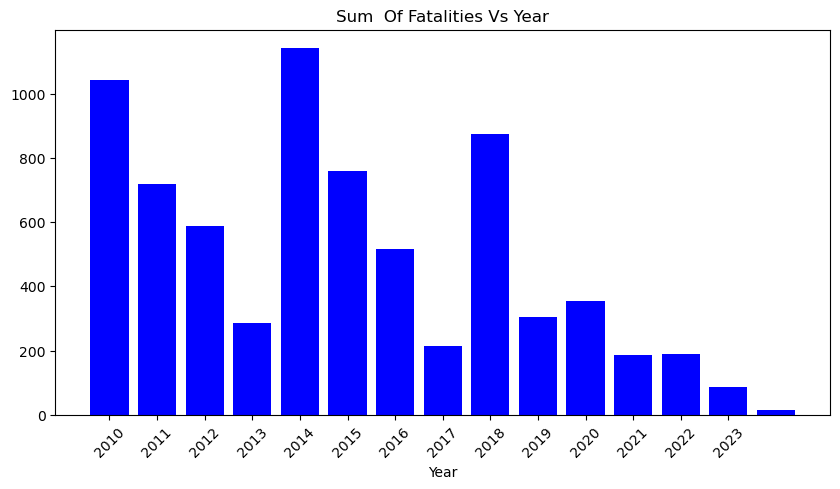

In [38]:
plt.figure(figsize=(10,5))
plt.bar(last_15_dead["Year"], last_15_dead["Fatalities (air)"],
         color ="blue")
plt.xticks(np.arange(2010,2024),rotation=45)
plt.xlabel("Year")
plt.title("Sum  Of Fatalities Vs Year")
plt.gca().xaxis.set_ticklabels([
    str(int(x)) for x in 
    plt.gca().xaxis.get_ticklocs()])

plt.show()

## Question 2

## What is the number of survivors in the last 15 years?

In [64]:
Survival = df["Aboard"]- df["Fatalities (air)"]
Survival

0         1
1         0
2         0
3         6
4         0
       ... 
5030      1
5031      3
5032    380
5033    228
5034      0
Length: 5035, dtype: int64

In [71]:
df.loc[:,"Survival"] = Survival

In [75]:
survived_cases = df.groupby(df["Year"])["Survival"].sum().reset_index()

In [77]:
last_15 = survived_cases.sort_values(by="Year",ascending=True).tail(15)

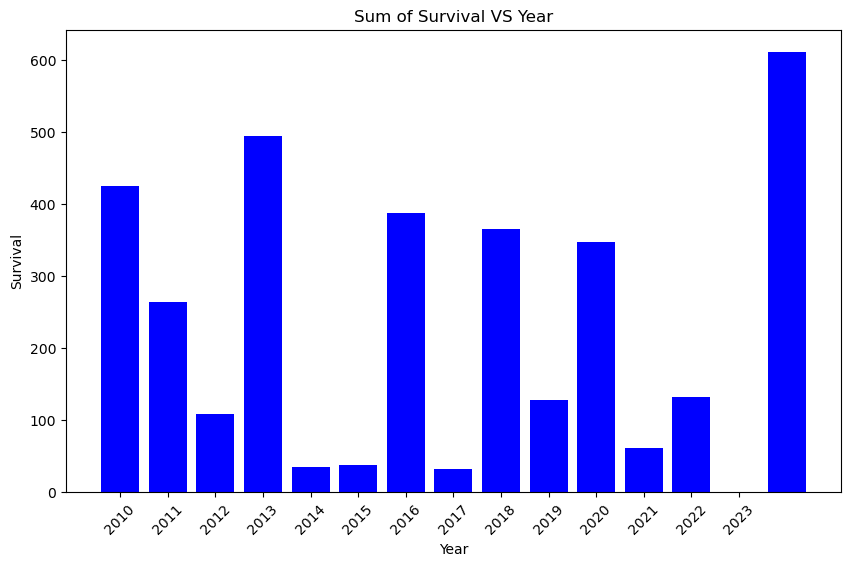

In [80]:
plt.figure(figsize=(10,6))
plt.bar(last_15["Year"], last_15["Survival"],
         color ="blue")
plt.xticks(np.arange(2010,2024), rotation=45)
plt.xlabel("Year")
plt.ylabel("Survival")
plt.title("Sum of Survival VS Year")
plt.gca().xaxis.set_ticklabels([
    str(int(x)) for x in 
    plt.gca().xaxis.get_ticklocs()])

plt.show()

## Which month has the highest number of Aircrashes?

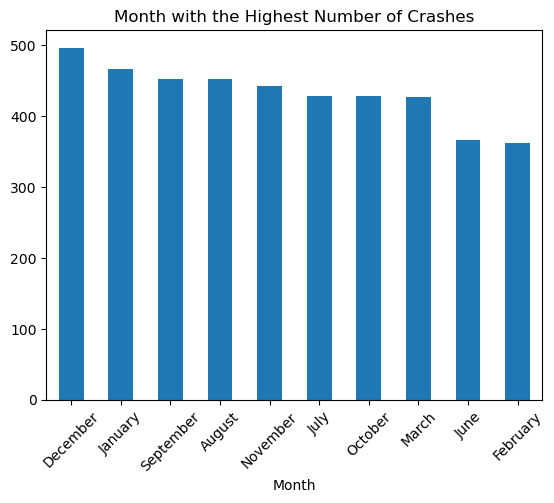

In [91]:
top_10 = df.Month.value_counts().head(10)
top_10.plot(kind = "bar")
plt.xticks(rotation=45)
plt.xlabel("Month")
plt.title("Month with the Highest Number of Crashes")


plt.show()

In [ ]:
## Question 4

## Which country has the highest number of crashes?

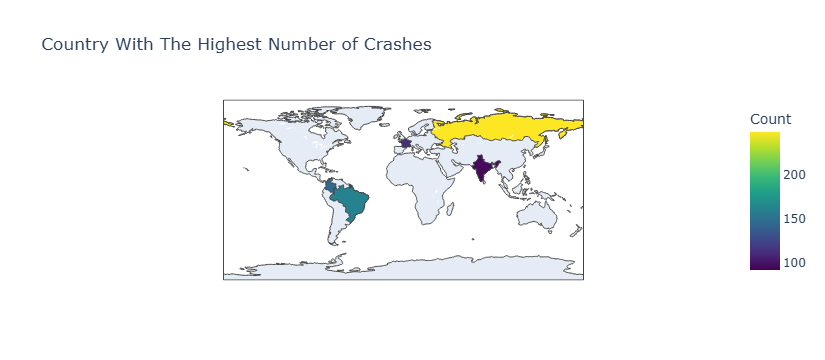

In [99]:
country_counts= df["Country/Region"].value_counts().reset_index().head(10)
country_counts.columns = ["Country/Region", "Count"]

fig= px.choropleth(country_counts,locations="Country/Region",
                   locationmode="country names",
                   color="Count",
                   color_continuous_scale="Viridis",
                   title= "Country With The Highest Number of Crashes")
fig.show()

## Who are the top 5 Airline operators?

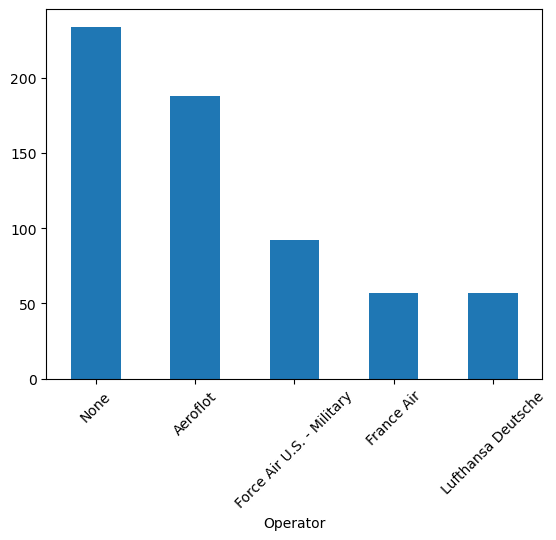

In [108]:
top_5 = df.Operator.value_counts().head(5)
top_5.plot(kind = "bar")
plt.xticks(rotation=45)
plt.show()

KEY FINDINGS

1. What is the total fatalities in the last 15 years?

The data shows a general decline in the total fatalities over the last 15 years with some fluctuations. The highest number of fatalities occured in 2014 (Over 1000) while the lowest occured in 2024. 
This analysis shows a declining trend in fatal accidents and improvements in aviation safety. However, there should be improvement and continued efforts to resuce the number of fatalities in aviation accidents. 

2. What is the number of surviviors in the last 15 years?

The data shows that the number of survivors in the last 15 years has a relatively stable trend. This indicates that despite some fluctuations, the overall survival rate in air accident has remained relatively consistent over the past 15years.

3. Which month has the highest number of Aircrashes?

The analysis shows that December has the highest number of Aircrashes with 497 cases. This might be due to harsh winter condition which distrupt airflow, causes loss of lift and leads to accidents.

4. Which country has the highest number of crashes?

The analysis shows that Russia has the highest number of crashes is Russia with 249 number of crashes. This is due to harsh weather conditions, technical failure, overloading of aircraft with either passengers or cargo, aging fleets and poor maintenance.

5. Who are the top five Airline operators?

The top five Airline operators are None, Aeroflot, Force Air US military, France Air and Lufthansa Deutsche

RECOMMENDATIONS:


•	Safety enhancements: There should be regular maintenance to ensure airlines are in good conditions and regular checks conducted to identify and address potential issues. 

•	Advanced weather radar systems should be installed to provide Pilots with real-time weather information to enable them make informed decisions for safety.

•	Implement collision avoidance systems to reduce the risk of mid-air collision.

•	Provide pilots with comprehensive training including simulator training to prepare them for emergency situations.

•	Technological advancement: Implement aircraft health monitoring systems to detect potential issues before they become major problem.

•	Implement automatic dependent surveillance-broadcast systems to provide more accurate and reliable information thereby reducing the risk of collisions

•	Establish and enforce stricter safety regulations including regular audits and inspections.

•	Encourage information sharing between airlines, regulatory bodies and safety organizations to facilitate learning and improvement. 

•	Implement flight data recorders which provide valuable data in the event of an accident in order to help investigators identify causes and implement safety improvements.
	
